In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
import seaborn as sns

### DatasetGeneration using sklearn(blob)

In [5]:
make_blobs?

In [173]:
X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=7)

In [174]:
print(X.shape,Y.shape)

(500, 2) (500,)


In [175]:
plt.style.use("seaborn")

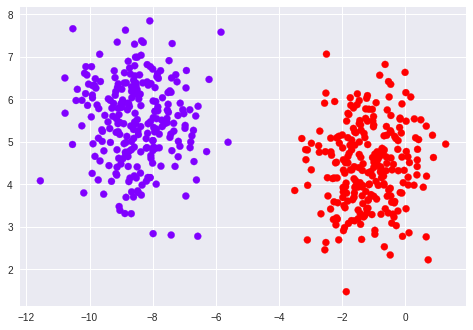

In [176]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")

### Implementation of single Node "NeuralNetwork" / "Perceptorn Model"

In [177]:
def sigmoid(y):
    return (1.0)/(1.0+np.exp(-y))
def predict(X,wt):
    return sigmoid(X.dot(wt))

In [178]:
# predict(np.array([1,2,3]),np.array([[1],[2],[3]]))

In [179]:
def loss(X,Y,Wt):#binary cross entropy
    y_cap=predict(X,Wt)
    l=np.mean((-Y)*(np.log(y_cap))-(1-Y)*(np.log(1-y_cap)))
    return l

In [180]:
def update(X,Y,wt,alpha=0.01): 
    #calculate gradient
    y_cap=predict(X,wt)
    diff=y_cap-Y
    dJ=X.T.dot(diff)
    dJ_dwt=dJ/float(X.shape[0])
    
    #update weight
    wt=wt-alpha*dJ_dwt
    
    return wt

In [181]:
def getprediction(X,wt):
    if X.shape[0]!=wt.shape[0]:
        bias=np.ones((X.shape[0],1))
        X=np.hstack((bias,X))
        
    pred=predict(X,wt)
    
    labels=np.zeros_like(pred)
    labels[pred>0.5]=1
    
    return labels

In [182]:
np.zeros_like?

In [183]:
def train(X,Y,epoch=10,alpha=0.01):
    bias=np.ones((X.shape[0],1))
    X=np.hstack((bias,X))
    
    wt=np.zeros((X.shape[1]))
    losses=[]
    for e in range(epoch):
        wt=update(X,Y,wt,alpha=alpha)
        
        if e%5==0:
            losses.append(loss(X,Y,wt))
            print("{}th epoch---> {}".format(e,loss(X,Y,wt)))
        
    return losses ,wt   

In [184]:
losses=train(X,Y,epoch=2000)

0th epoch---> 0.6607750397821072
5th epoch---> 0.5684525003255301
10th epoch---> 0.5189287073984412
15th epoch---> 0.4818815065642987
20th epoch---> 0.4507006673792104
25th epoch---> 0.4234399770637108
30th epoch---> 0.39927140312358966
35th epoch---> 0.377697874266483
40th epoch---> 0.3583510879287543
45th epoch---> 0.3409320202738319
50th epoch---> 0.3251896745324091
55th epoch---> 0.3109109274563424
60th epoch---> 0.2979140161753225
65th epoch---> 0.28604354151092126
70th epoch---> 0.2751663503313007
75th epoch---> 0.26516807326136743
80th epoch---> 0.2559502067565769
85th epoch---> 0.24742765967006025
90th epoch---> 0.23952669567817753
95th epoch---> 0.2321832104881411
100th epoch---> 0.2253412900891238
105th epoch---> 0.21895200364641185
110th epoch---> 0.21297239161739742
115th epoch---> 0.20736461599519684
120th epoch---> 0.20209524512412336
125th epoch---> 0.1971346502639911
130th epoch---> 0.192456495059092
135th epoch---> 0.18803730237656313
140th epoch---> 0.1838560857110917

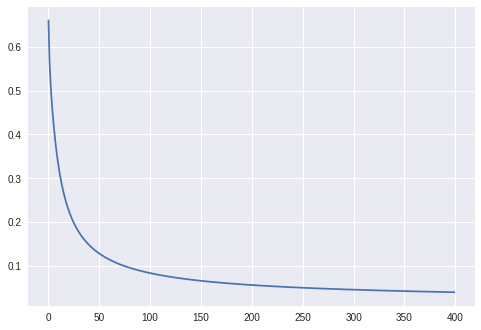

In [185]:
plt.plot(losses[0])

In [186]:
weights=losses[1]
print(weights)

[0.5649854  1.53017107 1.2740882 ]


### Draw the prediction line for classification

In [187]:
getprediction(X,weights)[:5]

array([1., 0., 1., 0., 0.])

In [188]:
pred_label=getprediction(X,weights)

In [189]:
def equationofline(wt,sl,el):
    x=np.linspace(sl,el,20)
    y=(-wt[0]-wt[1]*x)/wt[2]
    
    return x,y

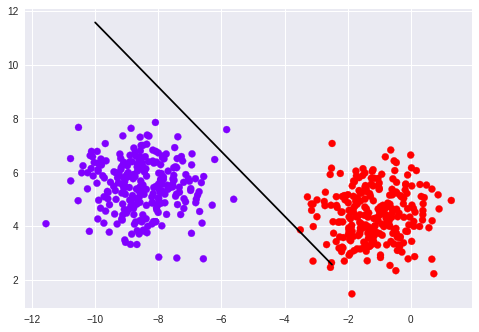

In [190]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")
x,y=equationofline(weights,-10.0,-2.5)
plt.plot(x,y,c="black")
# plt.scatter(X[:,0],X[:,1],c=pred_label)
plt.show()

## Accuracy

In [191]:
np.sum(np.array(pred_label)==Y)/X.shape[0]

0.992

## NonLinearClassifier

In [193]:
X1,Y1=make_moons(n_samples=1000,noise=0.3,random_state=2)

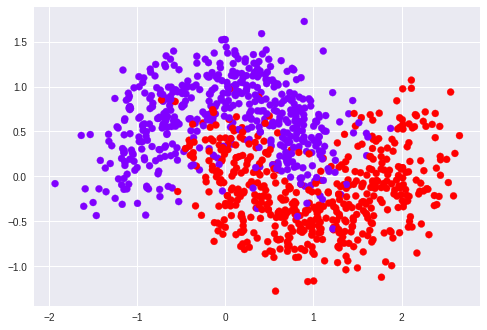

In [197]:
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="rainbow")

In [202]:
losses1=train(X1,Y1,epoch=1000)

0th epoch---> 0.6921203349525074
5th epoch---> 0.687055781832078
10th epoch---> 0.6821050175034761
15th epoch---> 0.6772649175963797
20th epoch---> 0.672532434542343
25th epoch---> 0.6679045977271064
30th epoch---> 0.663378513390646
35th epoch---> 0.6589513642997993
40th epoch---> 0.6546204092171422
45th epoch---> 0.65038298218854
50th epoch---> 0.6462364916704976
55th epoch---> 0.6421784195171112
60th epoch---> 0.6382063198450867
65th epoch---> 0.6343178177939693
70th epoch---> 0.6305106081974199
75th epoch---> 0.6267824541801128
80th epoch---> 0.6231311856935967
85th epoch---> 0.6195546980032891
90th epoch---> 0.6160509501376514
95th epoch---> 0.6126179633095321
100th epoch---> 0.609253819318664
105th epoch---> 0.6059566589433609
110th epoch---> 0.6027246803285883
115th epoch---> 0.5995561373767632
120th epoch---> 0.5964493381468903
125th epoch---> 0.5934026432669405
130th epoch---> 0.5904144643637487
135th epoch---> 0.5874832625141153
140th epoch---> 0.5846075467202669
145th epoch--

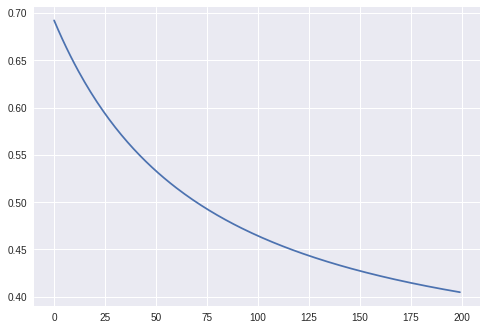

In [203]:
plt.plot(losses1[0])

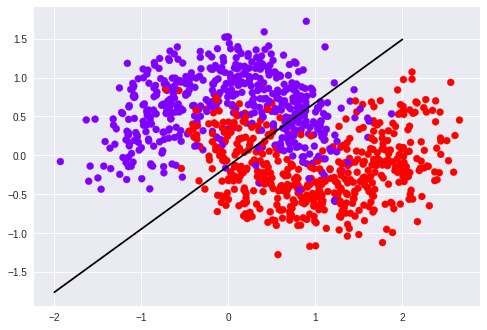

In [206]:
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="rainbow")
x1,y1=equationofline(losses1[1],-2,2)
plt.plot(x1,y1,c="black")

In [207]:
!ls

LinearClassifier.ipynb


In [208]:
!cd ..
!ls

LinearClassifier.ipynb


In [209]:
!cd ..

In [210]:
!ls

LinearClassifier.ipynb


In [211]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	./

nothing added to commit but untracked files present (use "git add" to track)
